<a href="https://colab.research.google.com/github/ChuksJoy/Python-Data-Analysis-Projects/blob/main/Telecom_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Churn Analysis of a Telecom Dataset**

####**Introduction** 

Orange S.A., previously known as France Télécom S.A., is a multinational telecommunications corporation headquartered in France. Within the dataset provided by Orange Telecom, we have access to meticulously organized customer activity data, including various features, as well as a churn label indicating whether a customer has canceled their subscription. Our objective is to thoroughly examine and analyze this data in order to identify the primary factors contributing to customer churn. Additionally, we aim to provide recommendations and strategies to ensure improved customer retention.

Through a comprehensive exploration and analysis of the dataset, we can uncover significant insights that shed light on the drivers of customer churn. By leveraging these findings, we can devise effective approaches to enhance customer retention and reduce churn.

#### **Business Understanding Of A Telecom Industry Customer Churn:**
Customer churn is a significant challenge faced by businesses across various industries, and it holds particular importance in the telecom industry. The impact of customer churn on a company's revenue can be substantial, especially within the telecom sector. As a result, telecom companies are actively working to develop predictive models to identify potential customer churn. In this highly competitive market, the telecom industry experiences an annual churn rate of approximately 15-25%, and acquiring new customers can cost 5-10 times more than retaining existing ones. Consequently, customer retention has emerged as a critical priority, surpassing customer acquisition in importance.

Given these circumstances, it is crucial to identify the factors that contribute to customer churn in order to take appropriate measures to mitigate it. Our project aims to gain a comprehensive understanding of the underlying causes of customer churn, enabling telecom operators to predict and anticipate customer churn more effectively.

#### **Objective**

The primary business objective of this project is to maximize the company's profit by effectively retaining customers and minimizing customer churn. To achieve this objective, we will focus on the following key goals:

1. Identifying the factors and root causes that significantly influence customers to churn. By thoroughly analyzing the available data, we can pinpoint the key drivers behind customer churn.

2. Taking appropriate steps and implementing proactive measures to retain churned customers. Once we understand the reasons behind customer churn, we can develop targeted strategies to address those issues and encourage customers to stay with the company.

3. Designing and providing personalized offers and incentives based on the factors identified to have a significant impact on customer churn. By tailoring offers to address specific pain points or concerns, we can enhance customer satisfaction and loyalty, ultimately reducing churn.

By focusing on these objectives, the project aims to boost the company's profitability by improving customer retention rates and minimizing the negative impact of customer churn.

##Loading Data and Importing Modules

In [1]:
#importing the required packages
import pandas as pd
import numpy as np
#import visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
#Loading the dataset
working_dir_path = '/content/Telecom Churn.csv'
telecom_df = pd.read_csv(working_dir_path)

### Exploring our Dataset


In [7]:
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
telecom_df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [9]:
telecom_df.shape

(3333, 20)

In [10]:
# columns in our dataset

telecom_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [11]:
#Getting the data types of all the columns
telecom_df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [12]:
#check details about the data set
telecom_df.info()
#we see that we have 3333 entries and no null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [13]:
telecom_df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [15]:
telecom_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [16]:
#checking the count of true and false in 'churn' feature
telecom_df.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [17]:
#Checking for Missing And Duplicate values
telecom_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [19]:
# Checking Duplicate Values
telecom_df[telecom_df.duplicated()].sum()

State                     0.0
Account length            0.0
Area code                 0.0
International plan        0.0
Voice mail plan           0.0
Number vmail messages     0.0
Total day minutes         0.0
Total day calls           0.0
Total day charge          0.0
Total eve minutes         0.0
Total eve calls           0.0
Total eve charge          0.0
Total night minutes       0.0
Total night calls         0.0
Total night charge        0.0
Total intl minutes        0.0
Total intl calls          0.0
Total intl charge         0.0
Customer service calls    0.0
Churn                     0.0
dtype: float64

### What we can get from our dataset so far:

Currently, the dataset contains 3333 rows and 20 columns. Among these columns, there is one boolean data type denoting churn, eight columns with float data type, eight columns with integer data type, and three columns with object data type representing categorical values. It is worth noting that the dataset does not contain any missing values, therefore there is no requirement for missing value imputation. Additionally, there are no duplicate values present in the dataset.

## Exploratory Data Analysis Of The Data Set

1. Analysing the churn column of our dataset


In [20]:
#Printing the unique value inside "churn" column
telecom_df["Churn"].unique()

array([False,  True])

In [21]:
#count of true and false in 'churn' feature
telecom_df.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

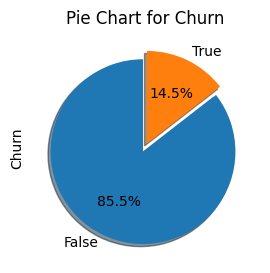

In [23]:
#Visualizing the churn using pie chart
telecom_df ['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(3,3))
plt.title('Pie Chart for Churn')
plt.show()

Following an analysis of the churn column, it was observed that approximately 15% of customers within the dataset have churned. To gain further insights, we will explore the other features and examine their correlation with the churn column. This analysis aims to uncover any relationships or patterns that exist between the features and customer churn.

2. Analysing the State column

In [24]:
#checking the unique value of sate column
telecom_df['State'].nunique()

51

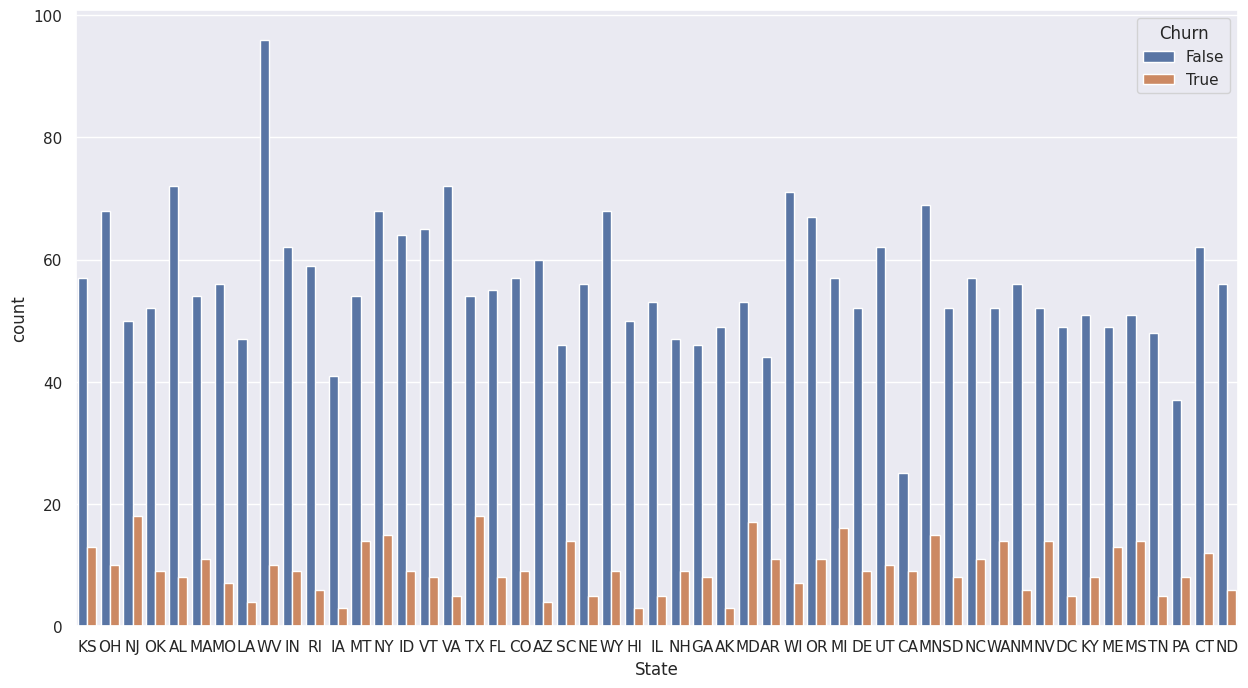

In [25]:
#Comparison churn with state by using countplot
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='State', hue="Churn", data=telecom_df)
plt.show()

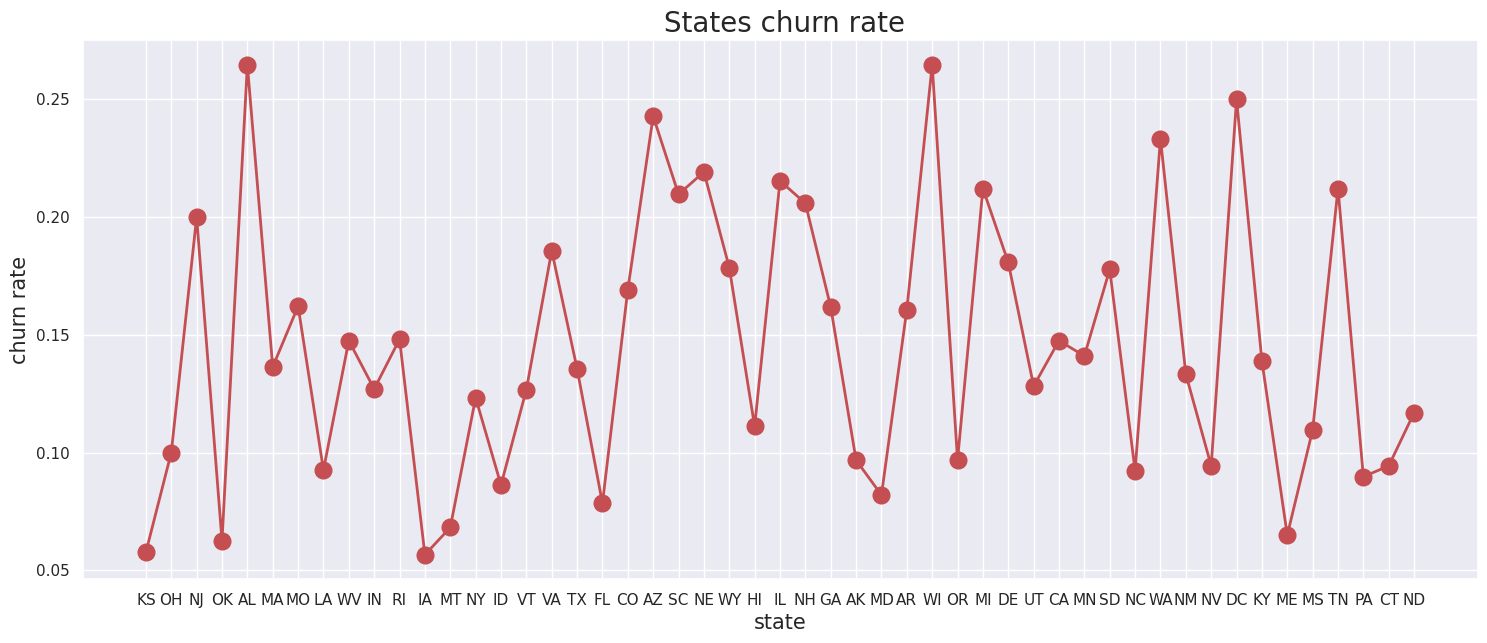

In [27]:
#visualizes the churn rate for each state in the telecom_df dataset.
# by extracting the unique values from the 'State' column of the telecom_df dataframe
# then grouping the telecom_df dataframe by 'State' 
# and calculate the mean of the 'Churn' column for each state. 

s1=telecom_df['State'].unique()
s2=telecom_df.groupby(['State'])['Churn'].mean()

plt.rcParams['figure.figsize'] = (18, 7)

plt.plot(s1,s2,color='r', marker='o', linewidth=2, markersize=12)

plt.title(" States churn rate", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('churn rate', fontsize = 15)
plt.show()

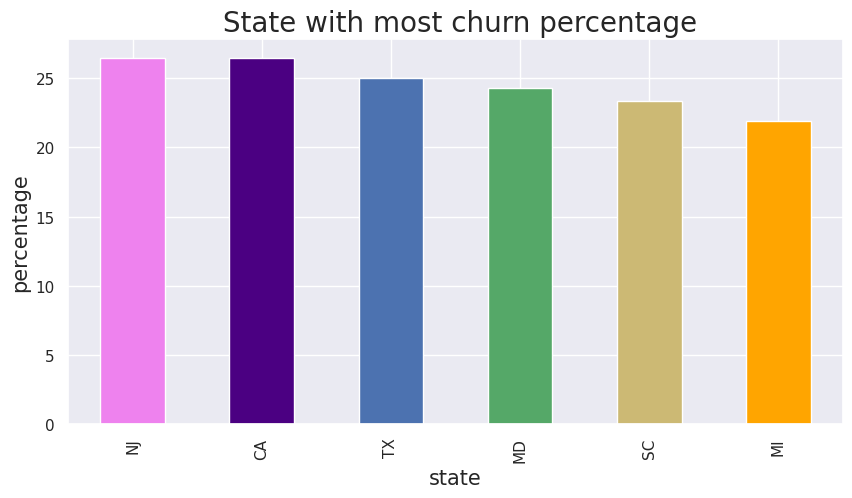

In [29]:
#bar chart that displays the states with the highest churn percentages. 
#The x-axis represents the states, the y-axis represents the churn percentages, 
#and each bar corresponds to a state's churn percentage. 

plt.rcParams['figure.figsize'] = (10, 5)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((telecom_df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(6).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

In [30]:
#calculate State vs Churn percentage
State_data = pd.crosstab(telecom_df["State"],telecom_df["Churn"])
State_data['Percentage_Churn'] = State_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(State_data)

Churn  False  True  Percentage_Churn
State                               
AK        49     3          5.769231
AL        72     8         10.000000
AR        44    11         20.000000
AZ        60     4          6.250000
CA        25     9         26.470588
CO        57     9         13.636364
CT        62    12         16.216216
DC        49     5          9.259259
DE        52     9         14.754098
FL        55     8         12.698413
GA        46     8         14.814815
HI        50     3          5.660377
IA        41     3          6.818182
ID        64     9         12.328767
IL        53     5          8.620690
IN        62     9         12.676056
KS        57    13         18.571429
KY        51     8         13.559322
LA        47     4          7.843137
MA        54    11         16.923077
MD        53    17         24.285714
ME        49    13         20.967742
MI        57    16         21.917808
MN        69    15         17.857143
MO        56     7         11.111111
M

In [31]:
# using the groupby function to check the percentage 
State_data = telecom_df.groupby('State')['Churn'].mean() * 100
print(State_data)


State
AK     5.769231
AL    10.000000
AR    20.000000
AZ     6.250000
CA    26.470588
CO    13.636364
CT    16.216216
DC     9.259259
DE    14.754098
FL    12.698413
GA    14.814815
HI     5.660377
IA     6.818182
ID    12.328767
IL     8.620690
IN    12.676056
KS    18.571429
KY    13.559322
LA     7.843137
MA    16.923077
MD    24.285714
ME    20.967742
MI    21.917808
MN    17.857143
MO    11.111111
MS    21.538462
MT    20.588235
NC    16.176471
ND     9.677419
NE     8.196721
NH    16.071429
NJ    26.470588
NM     9.677419
NV    21.212121
NY    18.072289
OH    12.820513
OK    14.754098
OR    14.102564
PA    17.777778
RI     9.230769
SC    23.333333
SD    13.333333
TN     9.433962
TX    25.000000
UT    13.888889
VA     6.493506
VT    10.958904
WA    21.212121
WI     8.974359
WV     9.433962
WY    11.688312
Name: Churn, dtype: float64


In [35]:
#top 10 churn state in ascending from the above list
telecom_df.groupby(['State'])['Churn'].mean().sort_values(ascending = False).head(10)

State
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: Churn, dtype: float64

Among the 51 unique states present in the dataset, several states exhibit varying churn rates.

Upon analysis, it was observed that CA, NJ, TX, MD, SC, and MI are among the states with higher churn rates, exceeding 21%.

One potential reason for these elevated churn rates in specific states could be attributed to insufficient coverage of the cellular network in those areas.

3. Analyzing the account length column

In [36]:
#Separating churn and non churn customers
churn_df     = telecom_df[telecom_df["Churn"] == bool(True)]
not_churn_df = telecom_df[telecom_df["Churn"] == bool(False)]

<ipython-input-38-161ecfc3160a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telecom_df['Account length']);


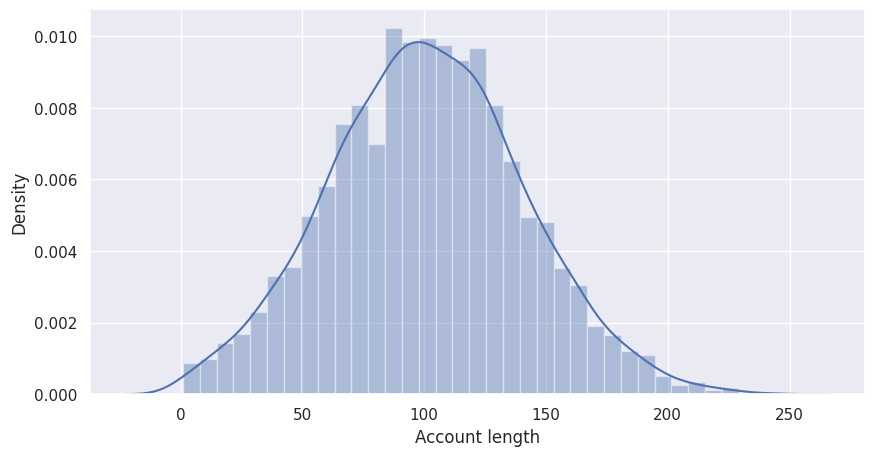

In [38]:
#Account length vs Churn
sns.distplot(telecom_df['Account length']);

<ipython-input-41-4c13ef49f86e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telecom_df['Account length'],color = 'blue',label="All", kde=True)
<ipython-input-41-4c13ef49f86e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_df['Account length'],color = "red",hist=False,label=

<function matplotlib.pyplot.show(close=None, block=None)>

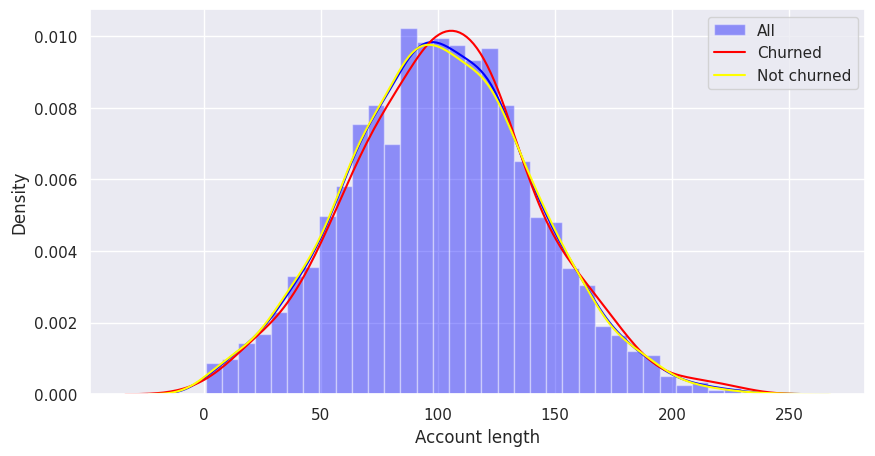

In [41]:
#comparison of churned account length and non churned account length 
sns.distplot(telecom_df['Account length'],color = 'blue',label="All", kde=True)
sns.distplot(churn_df['Account length'],color = "red",hist=False,label="Churned", kde=True)
sns.distplot(not_churn_df['Account length'],color = 'yellow',hist= False,label="Not churned", kde=True)
plt.legend()
plt.show

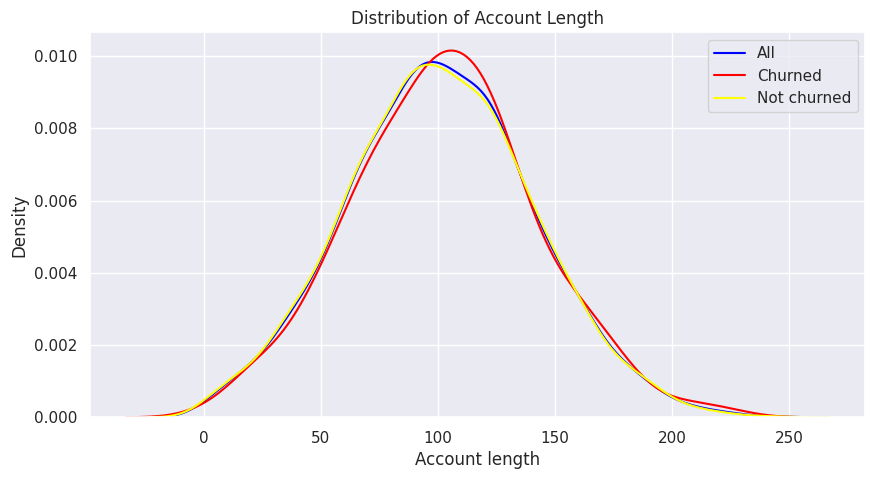

In [42]:
#Using a kdeplot

sns.kdeplot(data=telecom_df, x='Account length', color='blue', label="All")
sns.kdeplot(data=churn_df, x='Account length', color='red', label="Churned")
sns.kdeplot(data=not_churn_df, x='Account length', color='yellow', label="Not churned")

plt.legend()
plt.xlabel('Account length')
plt.ylabel('Density')
plt.title('Distribution of Account Length')
plt.show()

#### Interpretation

Based on the analysis of the "Account length" column, no significant relationship or useful connection to churn is found.

This means that the duration of an account's existence does not appear to have a strong influence on the likelihood of churn.

However, 

Overlapping Distributions: The kernel density plots of churned and not churned customers (red and green plots) show some overlap in the "Account length" distribution. This suggests that there is no clear-cut pattern or strong correlation between the account length and churn status.

Similar Shapes: The shapes of the kernel density plots for churned and not churned customers appear to be relatively similar, indicating that the distribution of "Account length" does not significantly differ between the two groups.

#### further analysis
To gain a deeper understanding of churn, it is necessary to explore and analyze other relevant features in the dataset. By investigating additional factors, we can uncover potential drivers or indicators of churn and further enhance our understanding of customer behavior and retention in the telecom industry.

4. Analyzing "International Plan" column

In [43]:
#Show count value of 'yes','no'
telecom_df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [44]:
#Show the unique data of "International plan"
telecom_df["International plan"].unique()

array(['No', 'Yes'], dtype=object)

In [45]:
#Calculate the International Plan vs Churn percentage 
International_plan_data = pd.crosstab(telecom_df["International plan"],telecom_df["Churn"])
International_plan_data['Percentage Churn'] = International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(International_plan_data)

Churn               False  True  Percentage Churn
International plan                               
No                   2664   346         11.495017
Yes                   186   137         42.414861


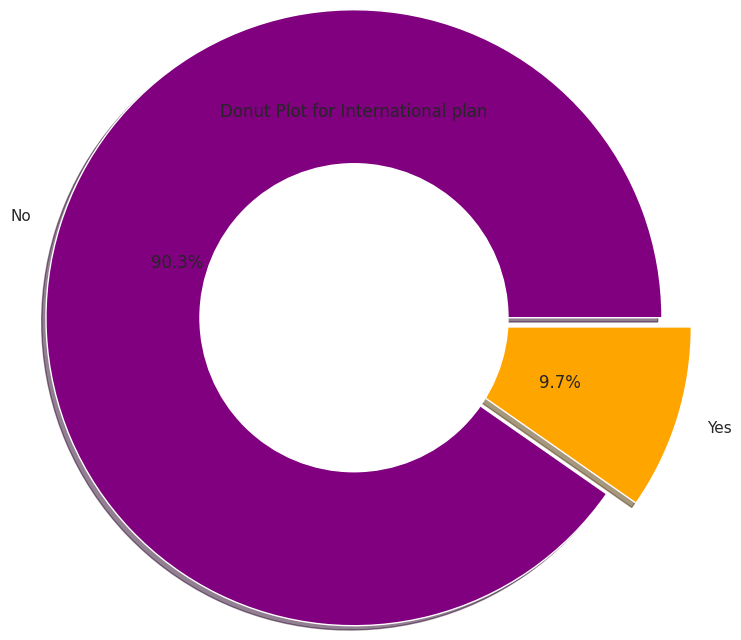

In [46]:
#To get the Donut Plot to analyze International Plan
data = telecom_df['International plan'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['No','Yes'],colors=['purple' ,'orange'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for International plan')
plt.show()

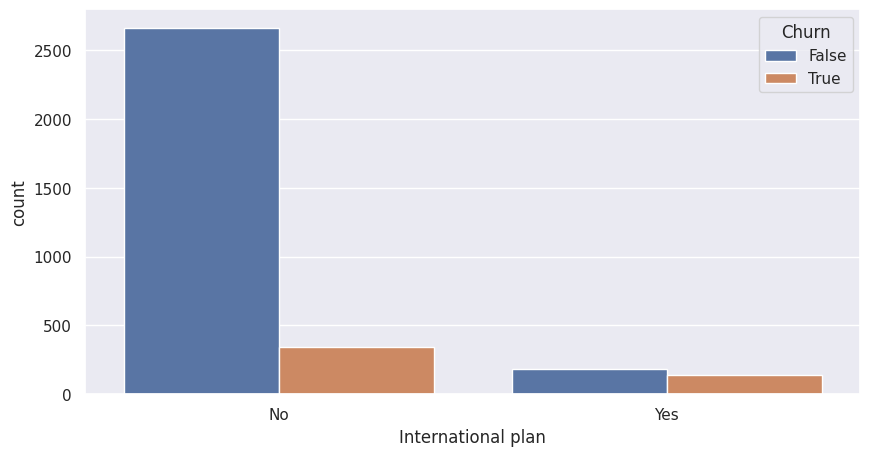

In [47]:
#Analysing by using countplot
sns.countplot(x='International plan',hue="Churn",data = telecom_df);

Based on the analysis of the "International plan" feature, the following observations can be made:

- Out of the total customers, 3010 do not have an international plan, while 323 customers have opted for an international plan.
- Among the customers with an international plan, a significant percentage of 42.4% churned, indicating a higher churn rate in this group.
- On the other hand, among customers without an international plan, only 11.4% churned, suggesting a lower churn rate in this category.
- These findings suggest that customers who have purchased an international plan are more likely to churn compared to those without an international plan.
- Possible reasons for the higher churn rate among customers with an international plan could be connectivity issues or high call charges associated with international calling.

In summary, the data indicates that customers with an international plan have a higher likelihood of churn, potentially due to factors such as connectivity problems or expensive international call rates. These insights highlight the importance of addressing these issues and providing better services or cost-effective plans to retain customers with international plans.

5. Analyzing "Voice Mail Plan" column

In [48]:
#show the unique value of the "Voice mail plan" column
telecom_df["Voice mail plan"].unique()

array(['Yes', 'No'], dtype=object)

In [49]:
#Calculate the Voice Mail Plan vs Churn percentage
Voice_mail_plan_data = pd.crosstab(telecom_df["Voice mail plan"],telecom_df["Churn"])
Voice_mail_plan_data['Percentage Churn'] = Voice_mail_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Voice_mail_plan_data)

Churn            False  True  Percentage Churn
Voice mail plan                               
No                2008   403         16.715056
Yes                842    80          8.676790


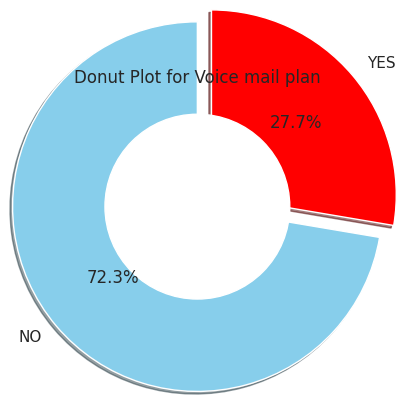

In [53]:
#To get the Donut Plot to analyze Voice mail plan
data = telecom_df['Voice mail plan'].value_counts()
explode = (0, 0.2)
plt.figure(figsize=(3, 3))
plt.pie(data, explode = explode,autopct='%1.1f%%',startangle=90,shadow=True,radius = 2.0, labels = ['NO','YES'],colors=['skyblue','red'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Voice mail plan')
plt.show()

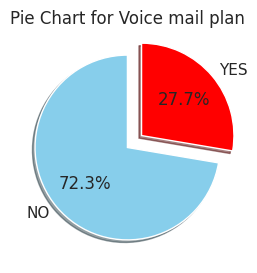

In [54]:
data = telecom_df['Voice mail plan'].value_counts()
explode = (0, 0.2)
plt.figure(figsize=(3, 3))  # Adjust the size of the figure

plt.pie(data, explode=explode, autopct='%1.1f%%', startangle=90, shadow=True,
        labels=['NO', 'YES'], colors=['skyblue', 'red'])

plt.title('Pie Chart for Voice mail plan')  # Set the title
plt.show()


<Axes: xlabel='Voice mail plan', ylabel='count'>

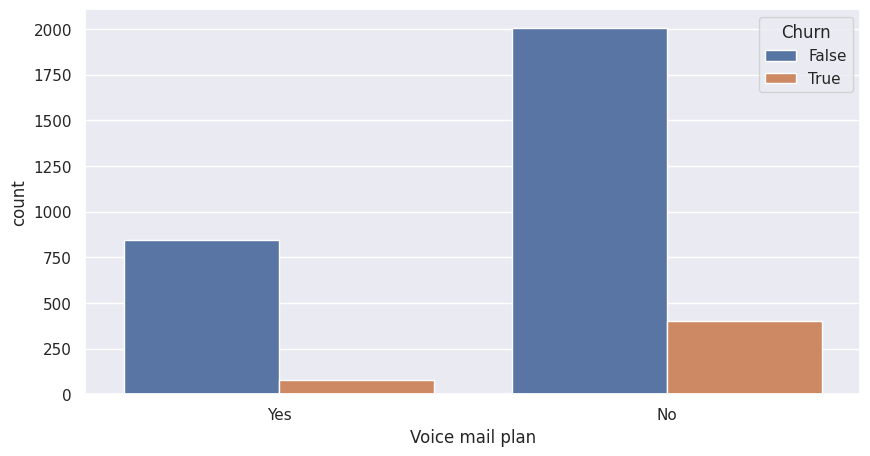

In [55]:
#Analysing by using countplot
sns.countplot(x='Voice mail plan',hue="Churn",data = telecom_df)


After analyzing the relationship between the "Voice mail plan" and "Churn" variables, it is evident that there is no clear correlation between having a voice mail plan and churn. Therefore, we cannot draw any definitive conclusions regarding the impact of the voice mail plan on churn.

Moving forward, let's explore the next related feature, which is the "Number of voice mails" column, to see if it provides any valuable insights or associations with churn.

6. Analyzing "Number vmail messages" column

In [56]:
#show the unique data of 'Number vmail messages' 
telecom_df['Number vmail messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9])

In [59]:
#Calculate the 'Number_vmail_messages' vs Churn percentage
Number_vmail_messages_data = pd.crosstab(telecom_df["Number vmail messages"],telecom_df["Churn"])
Number_vmail_messages_data['Percentage Churn'] = Voice_mail_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Voice_mail_plan_data)

Churn            False  True  Percentage Churn
Voice mail plan                               
No                2008   403         16.715056
Yes                842    80          8.676790


<Figure size 1000x800 with 0 Axes>

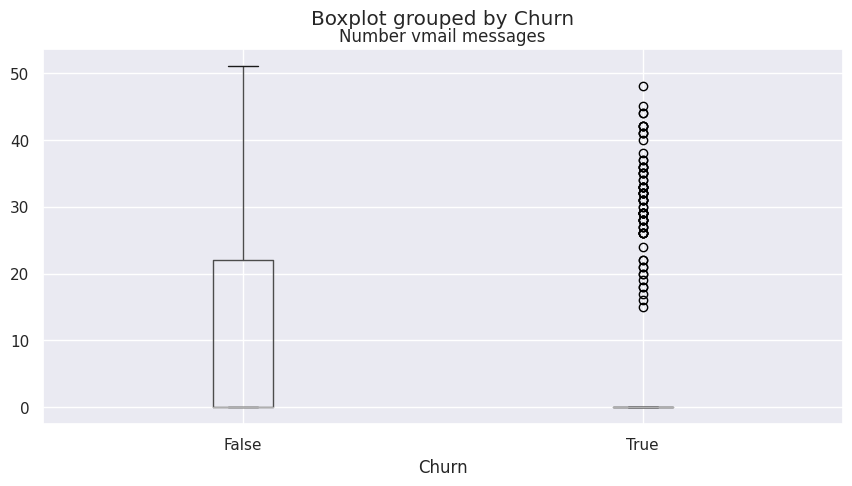

In [58]:
#Analysing by using boxplot diagram between 'number vmail messages' and 'churn'
fig = plt.figure(figsize =(10, 8)) 
telecom_df.boxplot(column='Number vmail messages', by='Churn')
fig.suptitle('Number vmail message', fontsize=14, fontweight='bold')
plt.show()

Based on the provided data, it appears that a significant number of customers churn when they have more than 20 voice-mail messages. This insight suggests that customers may become dissatisfied or overwhelmed with a large number of voice-mail messages, leading them to discontinue their service.

To address this issue and reduce churn, you can consider implementing the following strategies:

-Improve voice-mail management.
--Implement notification system for high message volume.
-Offer personalized voice-mail settings.
-Provide voice-mail transcription feature.
-Offer proactive customer support for high message volume.
-Promote alternative communication channels.
-Monitor impact and collect feedback for continuous improvement.




